In [1]:
import pandas as pd
# import wget

# wget.download('https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_telemetry.csv')
# wget.download('https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_errors.csv')
# wget.download('https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_maint.csv')
# wget.download('https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_failures.csv')
# wget.download('https://azuremlsampleexperiments.blob.core.windows.net/datasets/PdM_machines.csv')

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

## Telemetry
Data pertama disebut telemetry (time-series data) yang berisikan hasi pengukuran tegangan (voltage), RPM (rotation), tekanan (pressure) dan dan getaran/vibrasi (vibration) yang diambil dari 100 mesin secara real time: rata-rata dalam rentang setiap 1 jam selama tahun 2015. Sebagai gambaran, kita perlihatkan 5 record pada dataset.

In [2]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format='%Y-%m-%d %H:%M:%S')

print(telemetry.head(5))
telemetry.describe()

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


Text(0.5,0,'Date')

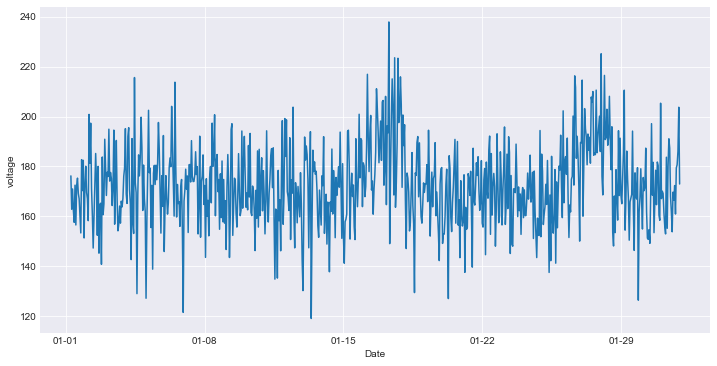

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Filter untuk machineID = 1 pada rentang 1-Jan hingga 1-Feb
plot_df = telemetry.loc[(telemetry['machineID'] == 1) & (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

# siapkan plotting pada rentang waktu diatas
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

## Errors
Data kedua adalah error logs yang muncul pada mesin. Log ini non-breaking errors yang muncul saat mesin aktif beroperasi dan tidak menyebabkan kegagalan. Tanggal dan waktu muncul error dilakukan pembulatan ke jam terdekat karena mengikuti data telemetry yang dicatat per satu jam.

In [4]:
# menyamakan format tanggal dan menyatakan errorID sebagai category
errors['datetime'] = pd.to_datetime(errors['datetime'], format='%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')

errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


Text(0,0.5,'Count')

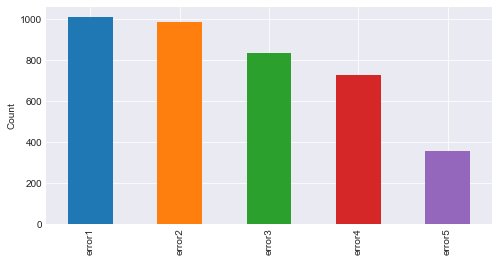

In [5]:
# menampilkan jumlah keseluruhan error yang tercatat pada log
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

## Maintenance
Berikut ini adalah data dari maintenance terjadwal dan maintenance tanpa terjadwal yang sesuai dengan pemeriksaan komponen rutin ataupun kerusakan. Data ini dibuat jika terdapat komponen yang diganti selama pengecekan terjadwal atau penggantian karena telah terjadi breakdown. Data yang dibuat karena breakdown akan disebut sebagai failures. Data maintenance ini tercatat 2014 dan 2015.

In [6]:
# konversi format penanggalan yang sebelumnya sebagai string
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')

maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Text(0,0.5,'count')

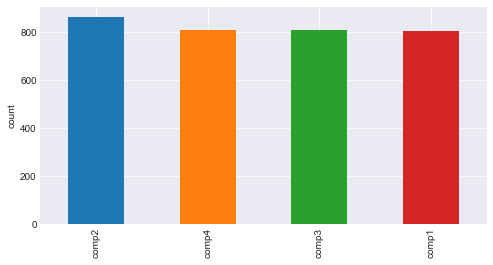

In [7]:
# mengecek frekuensi dalam bar-chart penggantian tiap komponen
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('count')

## Machines
Data informasi terkait mesin: model/type dan umur pakainya (years in service).

In [8]:
machines['model'] = machines['model'].astype('category')

machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


e:\17-python\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


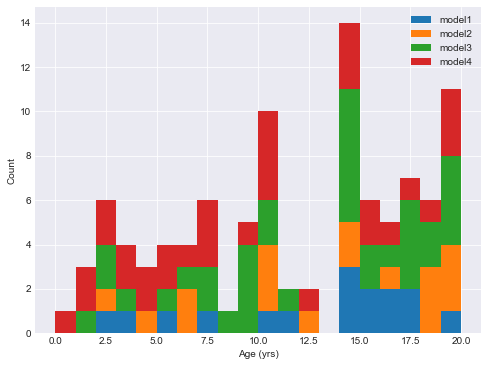

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
bins = plt.hist([machines.loc[machines['model'] == 'model1', 'age'], machines.loc[machines['model'] == 'model2', 'age'], machines.loc[machines['model'] == 'model3', 'age'], machines.loc[machines['model'] == 'model4', 'age']], 20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

## Failures
Berikut ini catatan dari penggantian komponen karena kerusakan. Masing-masing memiliki tanggal dan jam (dibulatkan ke jam terdekat), machine ID dan komponen yang diganti.

In [10]:
# format tanggal dan menyatakan failre sebagai kategori
failures['datetime'] = pd.to_datetime(failures['datetime'], format='%Y-%m-%d %H:%M:%S')
failures['failure'] = failures['failure'].astype('category')

failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Buat histogram dari kerusakan komponen

Text(0,0.5,'Count')

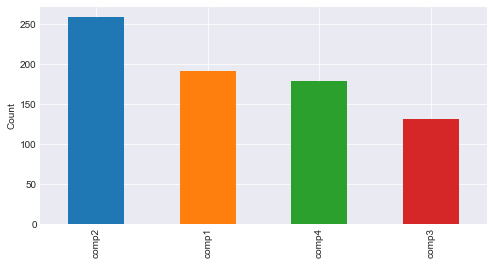

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')

# Feature Engineering
Langkah pertama setelah menyiapkan data dalam aplikasi PdM adalah "feature engineering" yang dibutuhkan untuk menggabungkan beberapa data berbeda untuk menciptakan "fitur" yang menjelaskan deskripsi terbaik tentang kondisi mesin.

## Lag features from Telemetry
Data telemetry hampir selalu disertai dengan time-stamps yang cocok untuk dilakukan perhitungan "lagging features". Akan dilakukan perhitungan rolling-mean, rolling-standard deviation, minimum, maksimum dll. Rolling-element akan dihitung dengan rentang per 3 jam.

In [12]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry, index='datetime', columns='machineID', values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry, index='datetime', columns='machineID', values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


Untuk merepresentasikan dampak jangka panjang, lag feature 24 jam dihitung dengan algoritma dibawah ini.

In [13]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.DataFrame.rolling(pd.pivot_table(telemetry, index='datetime', columns='machineID', values=col), window=24, center=False).mean().resample('3H', closed='left', label='right').first().unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.DataFrame.rolling(pd.pivot_table(telemetry, index='datetime', columns='machineID', values=col), window=24, center=False).mean().resample('3H', closed='left', label='right').first().unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214
12,1,2015-01-02 21:00:00,170.556674,452.267095,98.065860,40.033247
13,1,2015-01-03 00:00:00,168.460525,451.031783,99.273286,38.903462
14,1,2015-01-03 03:00:00,169.772951,447.502464,99.005946,39.389725
15,1,2015-01-03 06:00:00,170.900562,453.864597,100.877342,38.696225
16,1,2015-01-03 09:00:00,169.533156,454.785072,100.050567,39.449734


Kemudian, kolom feature diatas dilakukan merge untuk menciptakan dataset "final feature" dari telemetry.

In [14]:
# merge kolom yg tadi
telemetry_feat = pd.concat([telemetry_mean_3h, telemetry_sd_3h.iloc[:, 2:6], telemetry_mean_24h.iloc[:, 2:6], telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,170.772579,446.613440,100.854547,40.384564
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,4.716970,18.074248,4.733098,2.059861
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,155.812721,266.010419,91.057429,35.060087
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,168.070890,441.549802,98.668589,39.354062
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,170.210913,449.212554,100.097694,40.072752
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,172.459612,456.368008,101.611121,40.833364
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,220.782618,499.096975,152.310351,61.932124


In [15]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,170.792486,448.440437,95.766838,40.055214


## Lag Features from Errors
Hampir sama dengan telemetry, error disertai dengan time-stamps. Perbedaan terletak pada errorID yang berupa kategori dan seharusnya tidak dilakukan rata-rata antar interval waktu. Kita hitung jumlah error tiap type error. Dimulai dari reformatting data error, membuatnya menjadi per mesin dan per waktu hanya memiliki 1 buah error.

In [16]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


Cell yang masih kosong harus diisi dengan 0

In [17]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Terakhir, kita hitung total error dari tiap type error selama 24 jam, untuk timepoint yang diambil adalah 3 jam:

In [18]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.DataFrame.rolling(pd.pivot_table(error_count, index='datetime', columns='machineID', values=col), window=24, center=False).sum().resample('3H', closed='left', label='right').first().unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [19]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


## Days Since Last Replacement from Maintenance
Lakukan perhitungan berapa lama waktu yg dibutuhkan untuk mengganti lagi sebuah komponen (seperti perhitungan MTBF).

In [24]:
import numpy as np

# buat kolom untuk tiap type error
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# masukan data perbaikan pada mesin dan jam yg sama
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# masukan timepoint di lokasi tanpa ada pergantian komponen
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep, on=['datetime', 'machineID'], how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
#     convert indicator
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    
#     forward-fill
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')

comp_rep.describe()

TypeError: cannot operate on a series without a rhs of a series/ndarray of type datetime64[ns] or a timedelta